<a href="https://colab.research.google.com/github/Soubhagyabehera/CNN/blob/master/CNN-first.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

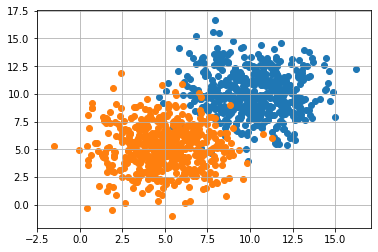

In [40]:

import numpy as np
import matplotlib.pyplot as plt

n_pts=500

top_reg_x=np.random.normal(10,2,n_pts)
top_reg_y=np.random.normal(10,2,n_pts)


bot_reg_x=np.random.normal(5,2,n_pts)
bot_reg_y=np.random.normal(5,2,n_pts)

# .T for transpose
top_reg= np.array((top_reg_x,top_reg_y)).T
bot_reg= np.array((bot_reg_x,bot_reg_y)).T

xtr=np.vstack((top_reg,bot_reg))

#to create a label matrix of ones and zeros
labels=np.matrix(np.append(np.ones(n_pts),np.zeros(n_pts))).T

plt.scatter(xtr[:n_pts,0],xtr[:n_pts,1])
plt.scatter(xtr[n_pts:,0],xtr[n_pts:,1])
plt.grid()
plt.show()

In [41]:
%tensorflow_version 1.x
from keras.models import Sequential #Linear stack of layers
from keras.layers import Dense # Every node of previous layer is connected to every node of next layer
from keras.optimizers import Adam # Optimization fucntion that controls learning rate, different types of optimizers: adagrad,sgd,adamax

model=Sequential()
model.add(Dense(units=1,input_dim=2,activation='sigmoid')) #units=no of node in output layes
model.compile(Adam(lr=0.1),loss='binary_crossentropy',metrics=['accuracy']) #if we have 2 labels then binary_crossentropy otherwise of more then 2 label then categorical
print(model.summary())

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________
None


In [53]:
h=model.fit(xtr,labels,epochs=10,verbose=1)

Epoch 1/10
1000/1000 [==============================] - 0s 92us/step - loss: 0.1021 - acc: 0.9630
Epoch 2/10
1000/1000 [==============================] - 0s 81us/step - loss: 0.0982 - acc: 0.9670
Epoch 3/10
1000/1000 [==============================] - 0s 78us/step - loss: 0.0929 - acc: 0.9700
Epoch 4/10
1000/1000 [==============================] - 0s 81us/step - loss: 0.0948 - acc: 0.9700
Epoch 5/10
1000/1000 [==============================] - 0s 82us/step - loss: 0.1019 - acc: 0.9630
Epoch 6/10
1000/1000 [==============================] - 0s 79us/step - loss: 0.0984 - acc: 0.9640
Epoch 7/10
1000/1000 [==============================] - 0s 80us/step - loss: 0.0928 - acc: 0.9730
Epoch 8/10
1000/1000 [==============================] - 0s 80us/step - loss: 0.0938 - acc: 0.9650
Epoch 9/10
1000/1000 [==============================] - 0s 83us/step - loss: 0.0933 - acc: 0.9740
Epoch 10/10
1000/1000 [==============================] - 0s 85us/step - loss: 0.1098 - acc: 0.9550


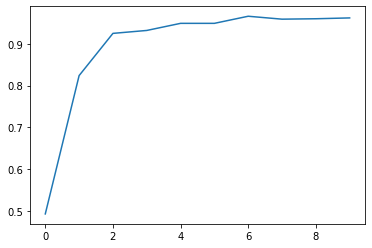

In [43]:
plt.plot(h.history['acc'])
plt.show()

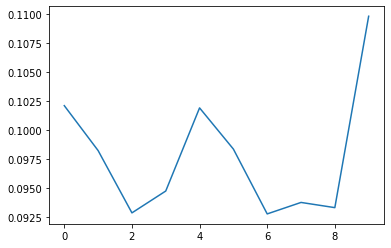

In [54]:
plt.plot(h.history['loss'])
plt.show()

In [48]:
model.predict_classes(np.array([[21,32]]))

array([[1]], dtype=int32)

In [49]:
model.predict_classes(np.array([[2,3]]))

array([[0]], dtype=int32)

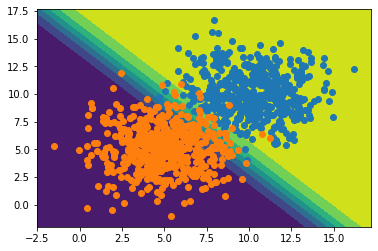

In [55]:
x_min,x_max=xtr[:,0].min() -1,xtr[:,0].max()+1
y_min,y_max=xtr[:,1].min() -1,xtr[:,1].max()+1

xx,yy=np.meshgrid(np.linspace(x_min,x_max),np.linspace(y_min,y_max))
grid=np.c_[xx.ravel(),yy.ravel()]

pred=model.predict_proba(grid)
pred=pred[:,0].reshape(xx.shape)
plt.contourf(xx,yy,pred)
plt.scatter(xtr[:n_pts,0],xtr[:n_pts,1])
plt.scatter(xtr[n_pts:,0],xtr[n_pts:,1])

plt.show()